<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#¿Qué-distribución-tienen--nuestros-datos?" data-toc-modified-id="¿Qué-distribución-tienen--nuestros-datos?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>¿Qué distribución tienen  nuestros datos?</a></span></li><li><span><a href="#Normalización" data-toc-modified-id="Normalización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Normalización</a></span><ul class="toc-item"><li><span><a href="#Qué-es-la-normalización-y-cuando-usarla" data-toc-modified-id="Qué-es-la-normalización-y-cuando-usarla-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Qué es la normalización y cuando usarla</a></span></li><li><span><a href="#Tipos-de-normalización" data-toc-modified-id="Tipos-de-normalización-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tipos de normalización</a></span><ul class="toc-item"><li><span><a href="#Manualmente-(explicar-la-fórmula)" data-toc-modified-id="Manualmente-(explicar-la-fórmula)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Manualmente (explicar la fórmula)</a></span></li><li><span><a href="#Transformaciones-logarítmicas-o-raices-cuadradas." data-toc-modified-id="Transformaciones-logarítmicas-o-raices-cuadradas.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Transformaciones logarítmicas o raices cuadradas.</a></span></li><li><span><a href="#stats.boxcox()" data-toc-modified-id="stats.boxcox()-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>stats.boxcox()</a></span></li><li><span><a href="#Sklearn-MinMaxScaller" data-toc-modified-id="Sklearn-MinMaxScaller-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Sklearn MinMaxScaller</a></span></li></ul></li></ul></li><li><span><a href="#Estandarización" data-toc-modified-id="Estandarización-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estandarización</a></span><ul class="toc-item"><li><span><a href="#Qué-es-la-estandarización-y-cuando-usarla" data-toc-modified-id="Qué-es-la-estandarización-y-cuando-usarla-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Qué es la estandarización y cuando usarla</a></span></li><li><span><a href="#Tipos-de-estandarización" data-toc-modified-id="Tipos-de-estandarización-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tipos de estandarización</a></span><ul class="toc-item"><li><span><a href="#Manualmente" data-toc-modified-id="Manualmente-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Manualmente</a></span></li><li><span><a href="#Sklearn-StandardScaler" data-toc-modified-id="Sklearn-StandardScaler-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Sklearn StandardScaler</a></span></li><li><span><a href="#Sklearn-RobustScaler" data-toc-modified-id="Sklearn-RobustScaler-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Sklearn RobustScaler</a></span></li></ul></li></ul></li><li><span><a href="#Diferencias-entre-normalización-y-estandarización" data-toc-modified-id="Diferencias-entre-normalización-y-estandarización-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diferencias entre normalización y estandarización</a></span></li></ul></div>

El éxito de un buen análisis de datos depende en gran medida de la calidad de los datos introducidos en el modelo. Como ya hemos visto, los datos del mundo real suelen estar sucios y contienen outliers* , tipos de datos erróneos, variables irrelevantes o datos no estandarizados. 

La presencia de cualquiera de ellos impedirá que hacer una  buena interpretación de nuestros datos. Por esta razón, la transformación de los datos brutos en un formato útil es esencial. Unas técnica con la que nos encontraremos muchas veces al preprocesar los datos es la normalización y estandarización. 


Estos procesos es una práctica común que consiste en transformar las columnas numéricas a una escala común. Podemos encontrarnos que algunas de nuestras variables tienen valores que difieren de otros varias veces. Las variables con valores más altos dominarán. Sin embargo, esto no significa que esas variables sean más importantes.

Tras la normalización y la estandarización, todas las variables tendrán un peso similar. 
Existen múltiples técnicas de normalización y estandarización en estadística. En este jupyter, cubriremos las más importantes. 

📌 Tenemos que tener en cuenta que hay variables que no tiene "sentido" normalizar, como por ejemplo variables de tipo fecha, años, latitud y longitud, los índices...

In [2]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from scipy import stats # para hacer la transformación box-cox

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [3]:
df = pd.read_csv("data/insurance_sin_outliers.csv", index_col = 0)

In [4]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0,yes,southwest,16884.9240
1,18.0,male,33.77,1,no,southeast,1725.5523


Como los conceptos que aprenderemos hoy se aplicarán unicamente sobre las variables numéricas, lo primero que haremos será seleccionar solo las variables numéricas. 

In [5]:
numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,age,bmi,children,charges
0,19.0,27.90,0,16884.9240
1,18.0,33.77,1,1725.5523


In [7]:
numericas.shape

(1338, 4)

# ¿Qué distribución tienen  nuestros datos? 

Antes de ponernos manos a la obra, tenemos que saber como están distribuidos nuestros datos. Este punto es esencial ya que aquellas variables que no tengan una distribución normal. Esta es la distribución más frecuente. Consiste en una gráfica de la función de densidad que tiene una forma acampanada y simétrica. Es la conocemos como **campana de Gauss**. 

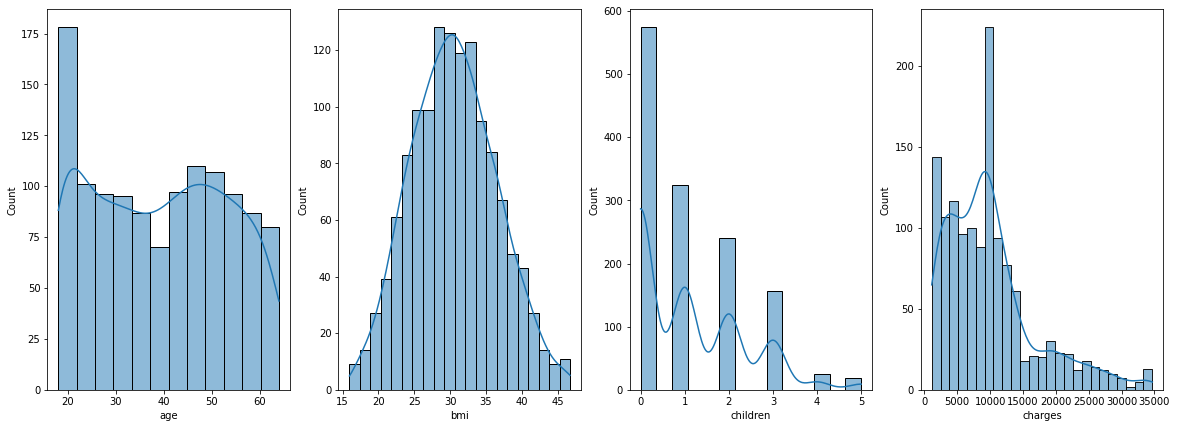

In [26]:
fig, ax = plt.subplots(1,4, figsize = (20,7))

for i in range(len(numericas.columns)):
    sns.histplot(numericas[numericas.columns[i]], kde = True, ax = ax[i])
plt.show()

# Normalización 

## Qué es la normalización y cuando usarla

A veces nos podemos encontrar que nuestras variables estan medidas en diferentes escalas, lo que hace que la comparación entre ellas sea complicada o que incluso no tengan una distribución normal, es decir, la campana de gaus que estamos más acostumbradas a ver. 

Basicamente, la normalización lo que va a hacer es poner todas estas variables que están en escalas diferentes en un una escala común. Es decir: 

> Es el proceso de reescalar los valores entre [0-1]
>
> Usaremos este tipo de aproximación cuando no sepamos como es la distribución de nuestros datos o NO sea gaussiana. 

La `normalización` es la transformación de escala de la distribución de una variable con el objetivo de poder hacer comparaciones respecto a conjuntos de elementos y a la media.

Entendámoslo mejor con un ejemplo: 

Supongamos que tenemos un dataframe que contiene dos variables: 

- El tiempo de viaje y 

- La distancia recorrida. 

El tiempo se mide en horas (por ejemplo, 5, 10, 25 horas) y la distancia en millas (por ejemplo, 500, 800, 1200 kilometros). 

Problemas que nos encontramos: 

- Un problema es que estas dos variables se miden en dos unidades diferentes: una en horas y otra en kilometros. 


-  La distribución de los datos, es bastante diferente en estas dos variables (tanto dentro de las variables como entre ellas). Una va de 5 -25 y la otra de 500-1200. 


> El objetivo de la normalización es transformar los datos de manera que no tengan dimensiones y/o tengan distribuciones similares. La normalización es un paso esencial en el preprocesamiento de datos en cualquier aplicación de *machine learning* y ajuste de modelos.



## Tipos de normalización 

### Manualmente



$$ x´ =  \frac{x -  µ}{max(x) - min(x)}$$

Donde: 

- `X`: es el valor que queremos normalizar.


- `µ`: es la media de todos los valores que queremos normalizar.

 
- `max(x)`: el valor máximo de nuestra variable.


- `min(x)`: el valor mínimo de nuestra variable.


In [27]:
numericas.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [36]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = numericas["charges"].mean()
maximo = numericas["charges"].max() 
minimo = numericas["charges"].min()

In [37]:
numericas["age_NORM"] = (numericas["charges"] - media) / (maximo - minimo )

In [38]:
numericas.head(2)

,age,bmi,children,charges,age_NORM
0,19.0,27.90,0,16884.9240,0.207720
1,18.0,33.77,1,1725.5523,-0.244121


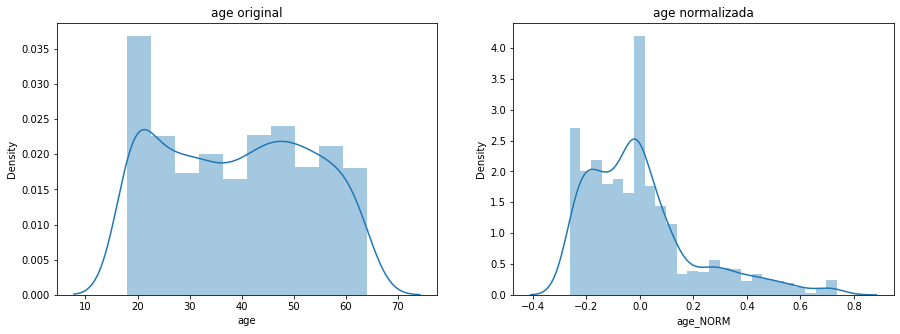

In [39]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age original')
axes[1].set_title('age normalizada')

sns.distplot(numericas['age'] ,ax = axes[0])
sns.distplot(numericas['age_NORM'], ax = axes[1]);

### Transformaciones logarítmicas o raices cuadradas. 

`LOGARÍTMICA`

La escala logarítmica implica la conversión de una columna a la escala lograrítimica. 

📌 Es importante tener en cuenta que esta transformación no la podremos hacer si tenemos algun valor en nuestra variable que sea 0.

En este caso aplicaremos este caso aplicaremos una*list comprehension* para evitar tener errores con los posibles valores 0 que tengamos en nuestra columna. 

In [40]:
numericas['charges_NORM'] = numericas['charges'].apply(lambda x: np.log(x) if x != 0 else 0)

In [41]:
numericas.head(2)

,age,bmi,children,charges,age_NORM,charges_NORM
0,19.0,27.90,0,16884.9240,0.207720,9.734176
1,18.0,33.77,1,1725.5523,-0.244121,7.453302


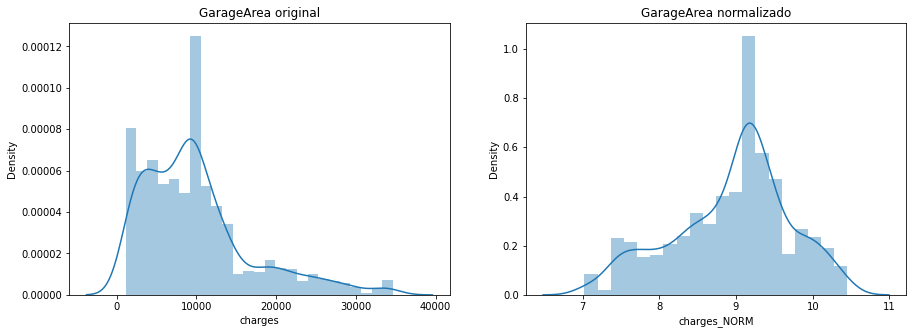

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('GarageArea original')
axes[1].set_title('GarageArea normalizado')

sns.distplot(numericas['charges'] ,ax = axes[0])
sns.distplot(numericas['charges_NORM'], ax = axes[1]);

`RAIZ CUADRADA`

La escala logarítmica implica la conversión de una columna a la escala lograrítimica. 

📌 Es importante tener en cuenta que esta transformación no la podremos hacer si tenemos algun valor en nuestra variable que sea 0.

In [43]:
import math 
numericas['charges_NORM'] = numericas['charges'].apply(lambda x: math.sqrt(x))

In [44]:
numericas.head(2)

,age,bmi,children,charges,age_NORM,charges_NORM
0,19.0,27.90,0,16884.9240,0.207720,129.942002
1,18.0,33.77,1,1725.5523,-0.244121,41.539768


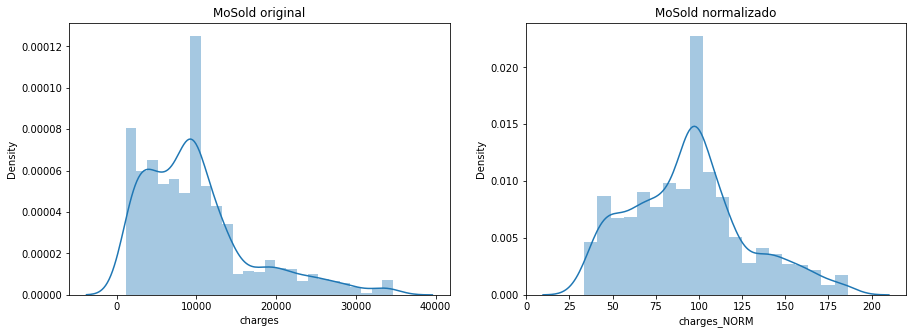

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('MoSold original')
axes[1].set_title('MoSold normalizado')

sns.distplot(numericas['charges'] ,ax = axes[0])
sns.distplot(numericas['charges_NORM'], ax = axes[1]);

### stats.boxcox()


Al igual que en las transformaciones logarítmicas **esta función requiere que la entrada sea positiva**. 


Una transformación Box cox se define como una forma de transformar las variables dependientes no normales de nuestros datos a una forma normal a través de la cual podemos realizar muchas más pruebas de las que podríamos hacer.

Aunque no es obligatorio que lo conozcamos, como breve introducción la matemática detrás de la transformación de Box-Cox:

¿Cómo podemos convertir nuestro pensamiento intuitivo en una función de transformación matemática? La transformación logarítmica es todo lo que necesitamos. Cuando se aplica una transformación logarítmica a una distribución no normal, se intenta ampliar las diferencias entre los valores más pequeños porque la pendiente de la función logarítmica es más pronunciada para los valores más pequeños, mientras que las diferencias entre los valores más grandes pueden reducirse porque, para los valores grandes, la distribución logarítmica tiene una pendiente moderada.

La Transformación Box-cox sólo se preocupa de calcular el valor de lambda que varía de - 5 a 5. Se dice que un valor de lambda es el mejor si es capaz de aproximar la curva no normal a una curva normal.

Utilizar esta fórmula manualmente es una tarea muy tediosa, y en Python tenemos implementada esta función. Para ello necesitaremos importar 👇🏽

```python
from scipy import stats
```

> Pero ojo!! Este método no nos permitirá meter todas las columnas a la vez, solo acepta Series. Por lo que tendremos que hacerlo variable a variable. 

📌 **NOTA** Como ya hemos dicho, no es obligatorio que entendamos las matemáticas que hay detrás de esta transformación, pero si alguna tiene más curiosidad os dejamos por aquí [este](https://towardsdatascience.com/notes-about-the-box-cox-transformations-18d7cd594265) artículo donde lo explica un poco más en detalle. 

Recordad que si no lo podéis ver tenéis que copiar el link e iros a una pestaña en incógnito y lo podréis ver sin problema !!!

In [20]:
# si lo aplicaramos solo a una columna lo haríamos de la siguiente forma: 

numericas['SalePrice_NORM'], lambda_ajustada = stats.boxcox(numericas['SalePrice'])


In [21]:
# el valor de lambda en esta tranformación sería
lambda_ajustada

-0.07692391328663316

In [22]:
numericas.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,MiscVal,MoSold,SalePrice,GarageArea_NORM,1stFlrSF_NORM,MoSold_NORM,SalePrice_NORM
0,60,65.0,8450,7,5,196.0,856,854,1710,2,1,548,0,2,208500,0.052905,6.752270,1.414214,7.932610
1,20,80.0,9600,6,8,0.0,1262,0,1262,2,1,460,0,5,181500,-0.009154,7.140453,2.236068,7.878263


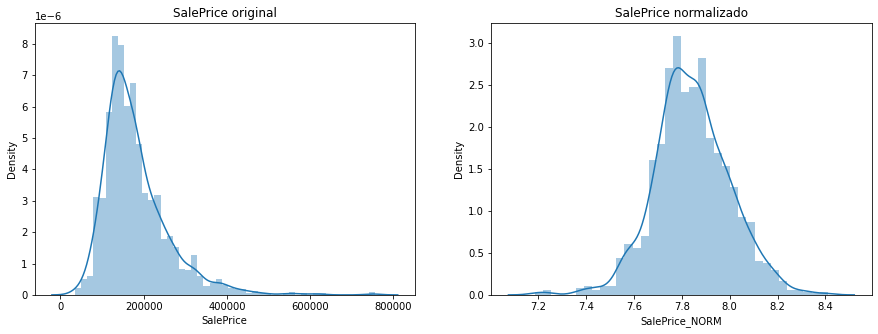

In [23]:
# ahora chequeemos si nuestra variable tiene una distribución normal

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('SalePrice original')
axes[1].set_title('SalePrice normalizado')

sns.distplot(numericas['SalePrice'] ,ax = axes[0])
sns.distplot(numericas['SalePrice_NORM'], ax = axes[1]);

In [24]:
# Hagamos esto en un for loop para no tener que repetir una y otra vez la misma líena de código en
## caso de que no queremos aplicarlo a todas las columnas

lambdas = [] # creamos una lista vacía para ir almacenando los valores de la lambdas

for col in numericas.columns:
    try:
        numericas[col], lambda_ = stats.boxcox(numericas[col])
        lambdas.append(lambda_)
        print(f'esta {col} si')
    except:
        print(f'no se pudo hacer la transforamción de {col}')

esta MSSubClass si
esta LotFrontage si
esta LotArea si
esta OverallQual si
esta OverallCond si
no se pudo hacer la transforamción de MasVnrArea
esta 1stFlrSF si
no se pudo hacer la transforamción de 2ndFlrSF
esta GrLivArea si
no se pudo hacer la transforamción de FullBath
no se pudo hacer la transforamción de KitchenAbvGr
no se pudo hacer la transforamción de GarageArea
no se pudo hacer la transforamción de MiscVal
esta MoSold si
esta SalePrice si
no se pudo hacer la transforamción de GarageArea_NORM
esta 1stFlrSF_NORM si
esta MoSold_NORM si
esta SalePrice_NORM si


### Sklearn MinMaxScaller


Es una e las técnicas de normalizado más importantes. Principalmente va a transformar las variables escalando cada una de ellas a un rango determinado, por defecto lo hará entre 0-1
Este estimador escala y traduce cada variable individualmente de manera que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.

Su sintaxis es: 

```python
MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
```

Donde: 

- `feature_range`: el rango sobre el que queremos normalizar nuestro datos. Por defecto entre 0 - 1. 


- `copy`: si queremos una copia de nuestra datos normalizada. 


- `clip`: la pondremos en True para recortar los valores transformados de los datos retenidos en el rango de características proporcionado.


Tendremos que usar la siguiente librería 👇🏽

```python
from sklearn.preprocessing import MinMaxScaler
```

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [27]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(numericas)


MinMaxScaler()

In [28]:
# transformamos los datos
X_normalizadas = minmax.transform(numericas)

In [29]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)


array([ 0., nan,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [30]:
# y los máximos?
X_normalizadas.max(axis=0)

array([ 1., nan,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

Perfecto 💪🏽! Ahora tenemos todos nuestras variables numéricas en la misma escala. Entre 0 y 1 

In [31]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_minmax = pd.DataFrame(X_normalizadas, columns = numericas.columns)
numericas_minmax.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,MiscVal,MoSold,SalePrice,GarageArea_NORM,1stFlrSF_NORM,MoSold_NORM,SalePrice_NORM
0,0.547126,0.000002,0.348130,0.712193,0.638418,0.1225,0.380257,0.413559,0.575537,0.666667,0.333333,0.386460,0.0,0.121211,0.609990,0.386460,0.379764,0.121211,0.606655
1,0.000000,0.000010,0.372603,0.610067,0.920332,0.0000,0.529065,0.000000,0.468025,0.666667,0.333333,0.324401,0.0,0.423074,0.565605,0.324401,0.528070,0.423074,0.562154


# Estandarización

## Qué es la estandarización y cuando usarla 

Estandarizar generalmente significa cambiar los valores de nuestras columnas de manera que la desviación estándar de la distribución sea igual a uno y la media igual a 0. 

$$Z =  \frac{X - µ}{Ω}$$

Donde:

- `X`: es el valor que queremos normalizar.


- `µ`: es la media de todos los valores que queremos normalizar.


- `Ω`: es la desviación estandar de los valores que queremos normalizar.

##  Tipos de estandarización

In [32]:
numericas.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,MiscVal,MoSold,SalePrice,GarageArea_NORM,1stFlrSF_NORM,MoSold_NORM,SalePrice_NORM
0,2.742416,2.699326e+14,10.433680,4.470077,2.287343,196.0,5.235744,854,7.621714,2,1,548,0,0.917985,7.932610,0.052905,3.069762,0.458993,8.902347
1,2.220973,1.567631e+15,10.602809,3.829085,3.297391,0.0,5.460253,0,7.303624,2,1,460,0,3.204135,7.878263,-0.009154,3.206881,1.602067,8.823622


### Manualmente 

Para poder hacerlo manualmente lo único que tendremos que hacer es aplicar la fórmula de arriba a la columna o columnas que queramos. 

In [33]:
numericas.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenAbvGr', 'GarageArea', 'MiscVal', 'MoSold', 'SalePrice',
       'GarageArea_NORM', '1stFlrSF_NORM', 'MoSold_NORM', 'SalePrice_NORM'],
      dtype='object')

In [46]:
# vamos a crear distintas variables con los estadísticos que necesitamos, media y desviacion estándar

media = numericas["charges"].mean()
desviacion = numericas["charges"].std() 


In [47]:
numericas["charges_ESTA"] = (numericas["charges"] - media) / desviacion

In [48]:
numericas.head(2)

,age,bmi,children,charges,age_NORM,charges_NORM,charges_ESTA
0,19.0,27.90,0,16884.9240,0.207720,129.942002,1.006034
1,18.0,33.77,1,1725.5523,-0.244121,41.539768,-1.182331


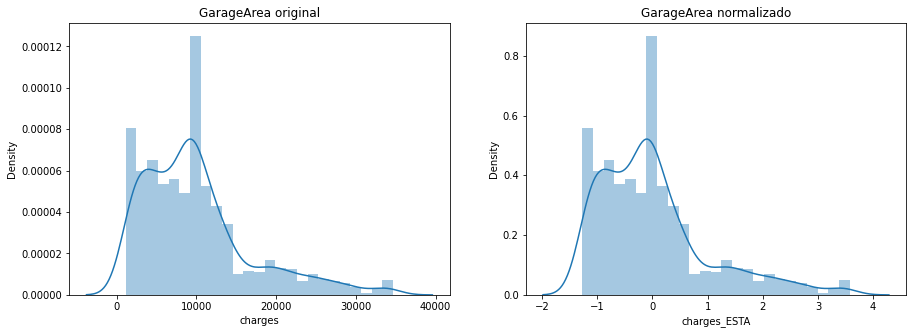

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('GarageArea original')
axes[1].set_title('GarageArea normalizado')

sns.distplot(numericas['charges'] ,ax = axes[0])
sns.distplot(numericas['charges_ESTA'], ax = axes[1]);

Si nos fijamos en los gráficas, ahora vemos que tenemos nuestros datos ajustados a una media de 0 y desviación de 1 👏🏽

### Sklearn StandardScaler

La estandarización que hemos visto antes, la podemos hacer también con un método de sklearn, veamos como. 

StandardScaler es el algoritmo más utilizado. Estandariza una característica restando la media y luego escalando a la varianza unitaria. La varianza unitaria significa dividir todos los valores por la desviación estándar. 


Nos va a dar como resultado una distribución con una desviación estándar igual a 1. La varianza es igual a 1 también, porque varianza = desviación estándar al cuadrado. Y 1 al cuadrado = 1.
StandardScaler hace que la media de la distribución sea aproximadamente 0.

Su sintaxis:

```python
StandardScaler(copy=True, with_mean=True, with_std=True)
```


Donde: 

- `copy`: si queremos una copia de nuestra datos normalizada. 


- `with_mean`: booleano. Por defecto True.  Si es True, centra los datos antes de escalarlos. 


- `with_std`: booleano. Por defecto True. Si es Verdadero, escala los datos a una varianza unitaria (o equivalentemente, a una desviación estándar unitaria).

Usaremos la siguiente librería

```python
from sklearn.preprocessing import StandardScaler
```

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [40]:
# ajustamos nuestros datos

scaler.fit(numericas)

StandardScaler()

In [41]:
# transformamos los datos. 

X_escaladas = scaler.transform(numericas)

In [42]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,MiscVal,MoSold,SalePrice,GarageArea_NORM,1stFlrSF_NORM,MoSold_NORM,SalePrice_NORM,SalePrice_ESTA
0,0.494880,-0.042217,-0.141167,0.665774,-0.479737,0.510015,-0.799591,1.161852,0.528505,0.789741,-0.211454,0.351000,-0.087688,-1.696395,0.571154,0.351000,-0.79934,-1.696395,0.569962,0.571154
1,-1.165337,-0.042023,0.105604,-0.044296,2.025054,-0.572835,0.429125,-0.795163,-0.382746,0.789741,-0.211454,-0.060731,-0.087688,-0.440850,0.227627,-0.060731,0.42861,-0.440850,0.225923,0.227627


### Sklearn RobustScaler

RobustScaler transforma muestra variable restando la mediana y dividiéndola por el rango intercuartil (valor del 75% - valor del 25%).

Al igual que MinMaxScaler, nuestra variable con valores altos tendra ahora una escala similar a la de las otras variables. Tenemos que tene en cuenta que este método no escala los datos en un intervalo predeterminado como MinMaxScaler. No cumple con la definición estricta de escala definimos al incio.

Por lo tanto, el rango de cada variable después de aplicar RobustScaler será mayor que el de MinMaxScaler.

Utilizaremos este método si deseamos reducir los efectos de los *outliers*. 

Su sintaxis:

```python
RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
```
Donde: 

- `with_centering`: booleano. Por defecto True. Si es True, centra los datos antes de escalar. 


- `with_scaling`: booleano. Por defecto True. Si es True, escala los datos al rango intercuartílico.


- `quantile_rangetuple`: Por defecto, esto es igual al IQR, es decir, q_min es el primer cuantil y q_max es el tercer cuantil. (q_min, q_max), 0.0 < q_min < q_max < 100.0, predeterminado=(25.0, 75.0)
Rango de cuantiles utilizado para calcular el escalado. 


- `copy`: booleano. Por defecto True. Si es Falso, intente evitar una copia y, en su lugar, realice una escala en el lugar. Pero tenemos que tener en cuenta que no se garantiza que esto funcione siempre en el lugar; p.ej. si los datos no son una matriz NumPy o una matriz CSR scipy.sparse, aún se puede devolver una copia.

- `unit_variance`: booleano. Por defecto False. Si es Verdadero, escalamos los datos para que las variables distribuidas normalmente tengan una variación de 1. En general, si la diferencia entre los valores x de q_max y q_min para una distribución normal estándar es mayor que 1, el conjunto de datos se reducirá. Si es menor que 1, el conjunto de datos se ampliará.

Necesitaremos importar la siguiente librería 👇🏽

```python
from sklearn.preprocessing import RobustScaler
```


In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
# construir el modelo de escalador
robust = RobustScaler()

In [45]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)


RobustScaler()

In [46]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [47]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,MiscVal,MoSold,SalePrice,GarageArea_NORM,1stFlrSF_NORM,MoSold_NORM,SalePrice_NORM,SalePrice_ESTA
0,0.133919,-0.122699,-0.267287,0.490043,0.000000,1.180723,-0.529914,1.173077,0.343103,0.0,0.0,0.281573,0.0,-1.501594,0.489914,0.281573,-0.529772,-1.501594,0.490365,0.489914
1,-0.756803,0.773003,0.029699,0.000000,2.739691,0.000000,0.326078,0.000000,-0.327665,0.0,0.0,-0.082816,0.0,-0.345321,0.215076,-0.082816,0.326097,-0.345321,0.215142,0.215076


# Diferencias entre normalización y estandarización

Para terminar esta lección hagamos un pequeño resumen de las diferencias entre normalización y estandarización


- Cuando se utiliza la estandarización, los nuevos datos no están acotados (a diferencia de la normalización).


- Utilizaremos la normalización cuando no conozcamos la distribución de nuestros datos o sepamos que no es gaussiana. 


- Usaremos la estandarización si nuestros datos tienen una distribución gaussiana.



- A veces, cuando la normalización no funciona, la estandarización puede funcionarnos bien.
